In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import h5py
import os
import re
from scipy.optimize import curve_fit
from scipy import ndimage
import pickle

In [2]:
with open('250502_Data_240925_BBRedMOT_2DScan_Bfield_Frequency_PixelSum.pkl', 'rb') as f:
    data = np.array(pickle.load(f))
with open('250502_Data_240925_BBRedMOT_2DScan_Bfield_Frequency_FrequencyAxis.pkl', 'rb') as f:
    freq_axis = np.array(pickle.load(f))/1e6 # Convert to MHz
with open('250502_Data_240925_BBRedMOT_2DScan_Bfield_Frequency_BFieldAxis.pkl', 'rb') as f:
    bfield_axis = pickle.load(f)

with open('250502_Data_240925_BBRedMOT_2DScan_Bfield_Frequency_PixelSum_1.pkl', 'rb') as f:
    data_1 = np.array(pickle.load(f))
with open('250502_Data_240925_BBRedMOT_2DScan_Bfield_Frequency_FrequencyAxis_1.pkl', 'rb') as f:
    freq_axis_1 = np.array(pickle.load(f))/1e6 # Convert to MHz
with open('250502_Data_240925_BBRedMOT_2DScan_Bfield_Frequency_BFieldAxis_1.pkl', 'rb') as f:
    bfield_axis_1 = pickle.load(f)

In [3]:
# Concatenate the datasets vertically
data_combined = np.vstack((data, data_1))

# Extend the bfield_axis to include the second dataset, ensuring no duplication in the overlap
bfield_axis_combined = bfield_axis + [y for y in bfield_axis_1 if y > bfield_axis[-1]]

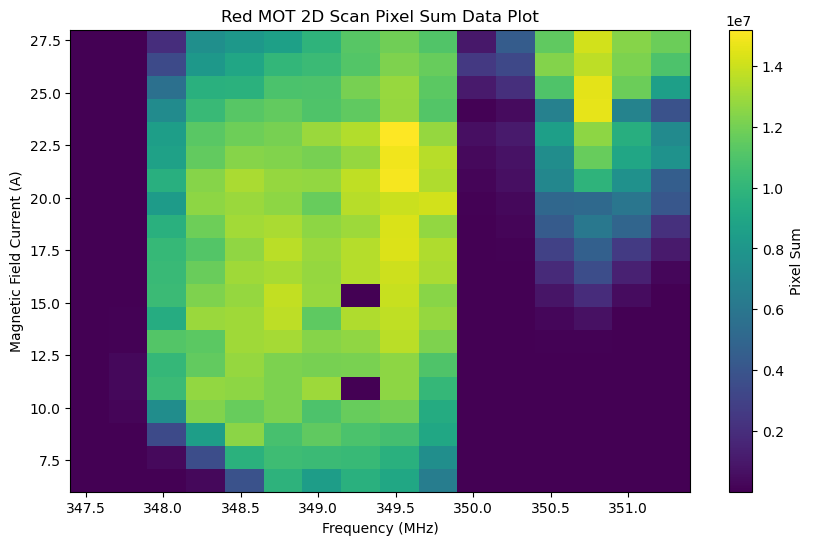

In [11]:
plt.figure(figsize=(10, 6))
plt.imshow(data_combined, origin='lower',aspect='auto', extent=[freq_axis[0], freq_axis[-1], bfield_axis_combined[0], bfield_axis_combined[-1]])
plt.colorbar(label='Pixel Sum')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Magnetic Field Current (A)')
plt.title('Red MOT 2D Scan Pixel Sum Data Plot')
plt.gca().set_aspect('auto', adjustable='box')  # This will make the y-axis adjust proportionally
plt.show()

In [12]:
with open('250502_BlueMOT_Data_240925_BBRedMOT_2DScan_Bfield_Frequency_PixelSum.pkl', 'rb') as f:
    BlueMOT_data = np.array(pickle.load(f))
with open('250502_BlueMOT_Data_240925_BBRedMOT_2DScan_Bfield_Frequency_FrequencyAxis.pkl', 'rb') as f:
    BlueMOT_freq_axis = np.array(pickle.load(f))/1e6 # Convert to MHz
with open('250502_BlueMOT_Data_240925_BBRedMOT_2DScan_Bfield_Frequency_BFieldAxis.pkl', 'rb') as f:
    BlueMOT_bfield_axis = pickle.load(f)

with open('250502_BlueMOT_Data_240925_BBRedMOT_2DScan_Bfield_Frequency_PixelSum_1.pkl', 'rb') as f:
    BlueMOT_data_1 = np.array(pickle.load(f))
with open('250502_BlueMOT_Data_240925_BBRedMOT_2DScan_Bfield_Frequency_FrequencyAxis_1.pkl', 'rb') as f:
    BlueMOT_freq_axis_1 = np.array(pickle.load(f))/1e6 # Convert to MHz
with open('250502_BlueMOT_Data_240925_BBRedMOT_2DScan_Bfield_Frequency_BFieldAxis_1.pkl', 'rb') as f:
    BlueMOT_bfield_axis_1 = pickle.load(f)

In [13]:
# Concatenate the datasets vertically
BlueMOT_data_combined = np.vstack((BlueMOT_data, BlueMOT_data_1))

# Extend the bfield_axis to include the second dataset, ensuring no duplication in the overlap
BlueMOT_bfield_axis_combined = BlueMOT_bfield_axis + [y for y in BlueMOT_bfield_axis_1 if y > BlueMOT_bfield_axis[-1]]

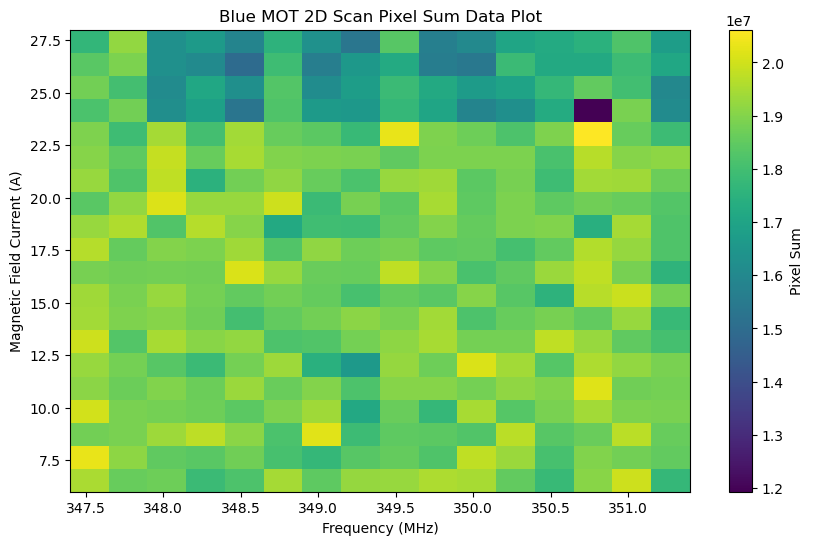

In [14]:
plt.figure(figsize=(10, 6))
plt.imshow(BlueMOT_data_combined, origin='lower',aspect='auto', extent=[BlueMOT_freq_axis[0], BlueMOT_freq_axis[-1], BlueMOT_bfield_axis_combined[0], BlueMOT_bfield_axis_combined[-1]])
plt.colorbar(label='Pixel Sum')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Magnetic Field Current (A)')
plt.title('Blue MOT 2D Scan Pixel Sum Data Plot')
plt.gca().set_aspect('auto', adjustable='box')  # This will make the y-axis adjust proportionally
plt.show()

In [15]:
ShelvingEnhancementFactor = 1.6
TransferEfficiency_Data_Combined = (data_combined / BlueMOT_data_combined) / ShelvingEnhancementFactor

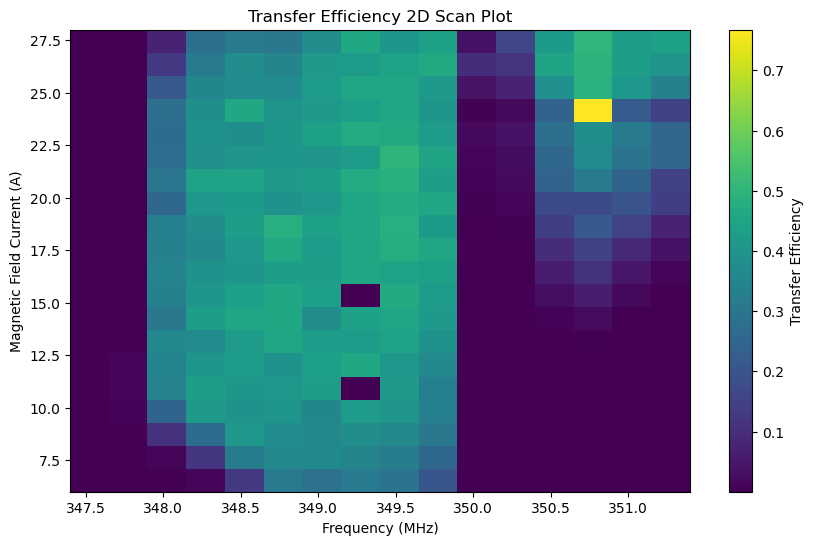

In [16]:
plt.figure(figsize=(10, 6))
plt.imshow(TransferEfficiency_Data_Combined, origin='lower',aspect='auto', extent=[BlueMOT_freq_axis[0], BlueMOT_freq_axis[-1], BlueMOT_bfield_axis_combined[0], BlueMOT_bfield_axis_combined[-1]])
plt.colorbar(label='Transfer Efficiency')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Magnetic Field Current (A)')
plt.title('Transfer Efficiency 2D Scan Plot')
plt.gca().set_aspect('auto', adjustable='box')  # This will make the y-axis adjust proportionally
plt.show()

# Now replot the above in nice Latex font

In [147]:
# copy paste this code to the beginning of your script to set the plotting style for a one column figure

from matplotlib import pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "figure.constrained_layout.use": True
})

plt.rcParams["savefig.bbox"] = None
plt.rcParams["figure.figsize"] = (5.9,5)  # (width, height) in inches, change height but not width
plt.rcParams["figure.titlesize"] = 10 # this is only for plt.suptitle, i set it to be the same as the rest

plt.rcParams["axes.titlesize"] = 10 # control title size
plt.rcParams["axes.labelsize"] = 10 # control x and y axis labels
plt.rcParams["axes.labelpad"] = 4.0 # distance between axis label and axis numbers
plt.rcParams["xtick.labelsize"] = 10 # independent control of xlabel fontsize
plt.rcParams["ytick.labelsize"] = 10 # independent control of ylabel fontsize

plt.rcParams["legend.fontsize"] = 7.5 # control legend size, I set it to be slightly smaller than title/axes label
# plt.rcParams["legend.facecolor"] = (0.9, 0.9, 0.9) # legend background color
# plt.rcParams["legend.edgecolor"] = (0, 0, 0) # legend border line color
# plt.rcParams["legend.frameon"] = True # whether or not to draw a border around legend
# plt.rcParams["legend.framealpha"] = 0.1 # legend background transparency
plt.rcParams["legend.loc"] = "best" # default legend location
plt.rcParams["legend.handletextpad"] = 0.8  # Horizontal space between legend point and text (default 0.8)
plt.rcParams["legend.labelspacing"] = 0.6  # Vertical space between legend entries (default 0.5)
# plt.rcParams["legend.columnspacing"] = 2.0  # Space between columns in multi-column legends
# plt.rcParams["legend.borderpad"] = 1.0  # Space between legend content and the box
# plt.rcParams["legend.handlelength"] = 2.0  # Length of legend marker lines

plt.rcParams["lines.linewidth"] = 1
plt.rcParams["lines.markersize"] = 6 #data point size

# CHOOSE NICE COLOR FOR DARK MARKER EDGEWIDTH FROM "dodgerblue","mediumseagreen","crimson","mediumpurple","slateblue","darkorange","peru","goldenrod"
# plt.rcParams["lines.linewidth"] = 1
# plt.rcParams["lines.markersize"] = 6 #data point size
# plt.rcParams["lines.markeredgewidth"] = 1.5 # width of the edge of the marker
# plt.rcParams["lines.markeredgecolor"] = "black" # color of the edge of the marker
# plt.rcParams["lines.markerfacecolor"] = "dodgerblue" # color of the inside of the marker
# plt.rcParams["lines.marker"] = "o" # marker type, see https://matplotlib.org/stable/api/markers_api.html for all options
# plt.rcParams["lines.color"] = "black" # color of the line
# # CHOOSE NICE COLOR FOR DARK MARKER EDGEWIDTH FROM "dodgerblue","mediumseagreen","crimson","mediumpurple","slateblue","darkorange","peru","goldenrod"


plt.rcParams["grid.linestyle"] = "--"
plt.rcParams['axes.grid'] = False
# plt.rcParams["grid.linewidth"] = 0.7

# plt.rcParams["xtick.major.pad"] = 4.0 # distance between xticks dashes and xaxis numbers
# plt.rcParams["xtick.major.size"] = 3.0
# plt.rcParams["xtick.major.width"] = 0.7
# plt.rcParams["ytick.major.pad"] = 4.0 # distance between yticks dashes and yaxis numbers
# plt.rcParams["ytick.major.size"] = 3.0
# plt.rcParams["ytick.major.width"] = 0.7

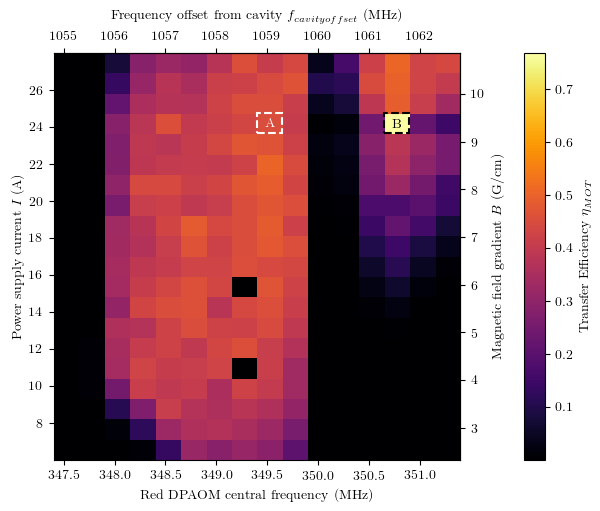

In [148]:
fig, ax = plt.subplots()

plt.imshow(TransferEfficiency_Data_Combined, cmap='inferno', origin='lower',aspect='auto', extent=[BlueMOT_freq_axis[0], BlueMOT_freq_axis[-1], BlueMOT_bfield_axis_combined[0], BlueMOT_bfield_axis_combined[-1]])

# Define the transformation functions for the secondary x-axis
def freq_to_offset(x):
    return x * 2 + 460 - 100 
def offset_to_freq(x):
    return (x + 100 - 460) / 2
# Apply the transformation functions for the secondary axis
ax_top = ax.secondary_xaxis('top', functions=(freq_to_offset, offset_to_freq))
ax_top.set_xlabel(r'Frequency offset from cavity $f_{cavityoffset}$ (MHz)', labelpad=8)

# Define the transformation functions for the secondary y-axis
def current_to_bfieldgradient(x): #Convert current to gauss/cm
    return x*0.388
def bfieldgradient_to_current(x): #Convert gauss/cm to current
    return x/0.388
# Apply the transformation functions for the secondary axis
ax_right = ax.secondary_yaxis('right', functions=(current_to_bfieldgradient, bfieldgradient_to_current))
ax_right.set_ylabel(r'Magnetic field gradient $B$ (G/cm)')

# Add a rectangle annotation with text
rect = plt.Rectangle((349.4,23.65), 0.25, 1.1, 
                     linewidth=1.5, edgecolor='white', facecolor='none', linestyle='--')
ax.add_patch(rect)
ax.text(349.525, 24.15, 'A', color='white', ha='center', va='center')

# Add a rectangle annotation  with text
rect = plt.Rectangle((350.65,23.65), 0.25, 1.1, 
                     linewidth=1.5, edgecolor='black', facecolor='none', linestyle='--')
ax.add_patch(rect)
ax.text(350.775, 24.15, 'B', color='black', ha='center', va='center')

plt.colorbar(label=r'Transfer Efficiency $\eta_{MOT}$')
plt.xlabel('Red DPAOM central frequency (MHz)')
plt.ylabel('Power supply current $I$ (A)')
plt.yticks([8,10,12,14,16,18,20,22,24,26])




plt.savefig('250502 BBRedMOT2DScanFreqBFieldResultsPlot.pdf', dpi=300)

In [22]:
print(f"Original frequency range: {BlueMOT_freq_axis[0]} - {BlueMOT_freq_axis[-1]}")
print(f"Transformed range: {freq_to_offset(BlueMOT_freq_axis[0])} - {freq_to_offset(BlueMOT_freq_axis[-1])}")


Original frequency range: 347.4 - 351.4
Transformed range: 1054.8 - 1062.8


# 250502 Plot Fluorescence Images

In [110]:
# region (R) = red detuned

import json

file_path = r"/Volumes/MBQD_data/AION/Data/2024/09/25/25-09-2024/BBscan_Bfield_vs_freq2/data_04_50_16_25_09_2024.h5"
# Open the HDF5 file to extract the relevant datasets
with h5py.File(file_path, 'r') as h5file:
    R_blue_mot_horizontal_camera_image = h5file['horizontal camera blue mot'][:]
    R_red_mot_horizontal_camera_image = h5file['horizontal camera red mot'][:]
    R_experimental_parameters = json.loads(h5file['parameters'][()])

In [111]:
experimental_parameters


{'sequence_parameters': {'time_of_flight': 0.001,
  'sequence_start_dead_time': 1.0,
  'sequence_end_dead_time': 2.0},
 'blue_phase_ramping': {'blue_phase_nominal_frequency': 125000000.0,
  'blue_phase_ramping_duration': 0.05,
  'blue_phase_ramping_detuning_start': 0.0,
  'blue_phase_ramping_detuning_end': 0.0,
  'blue_phase_ramping_amplitude_start': 1.0,
  'blue_phase_ramping_amplitude_end': 0.0,
  'blue_phase_nominal_frequency_reset': 125000000.0,
  'blue_ramping_amplitude_reset': 1.0,
  'blue_phase_ramping_Bfield_start': 100.0,
  'blue_phase_ramping_Bfield_end': 100.0,
  'blue_phase_ramping_Bfield_voltage': 10.0},
 'broadband_fixed_phase': {'broadband_fixed_phase_duration': 1.0,
  'broadband_fixed_phase_central_frequency': 349533333.3333333,
  'broadband_fixed_phase_modulation_width': 5000000.0,
  'broadband_fixed_phase_Bfield': 24.0,
  'broadband_fixed_phase_dpaom_amplitude': 1.0},
 'broadband_cone_phase_ramping': 'no_broadband_cone',
 'narrowband_capture_phase_ramping': 'no_narrow

In [112]:
# region (B) = blue detuned

import json

file_path = r"/Volumes/MBQD_data/AION/Data/2024/09/25/25-09-2024/BBscan_Bfield_vs_freq2/data_51_46_16_25_09_2024.h5"
# Open the HDF5 file to extract the relevant datasets
with h5py.File(file_path, 'r') as h5file:
    B_blue_mot_horizontal_camera_image = h5file['horizontal camera blue mot'][:]
    B_red_mot_horizontal_camera_image = h5file['horizontal camera red mot'][:]
    B_experimental_parameters = json.loads(h5file['parameters'][()])

In [69]:
experimental_parameters


{'sequence_parameters': {'time_of_flight': 0.001,
  'sequence_start_dead_time': 1.0,
  'sequence_end_dead_time': 2.0},
 'blue_phase_ramping': {'blue_phase_nominal_frequency': 125000000.0,
  'blue_phase_ramping_duration': 0.05,
  'blue_phase_ramping_detuning_start': 0.0,
  'blue_phase_ramping_detuning_end': 0.0,
  'blue_phase_ramping_amplitude_start': 1.0,
  'blue_phase_ramping_amplitude_end': 0.0,
  'blue_phase_nominal_frequency_reset': 125000000.0,
  'blue_ramping_amplitude_reset': 1.0,
  'blue_phase_ramping_Bfield_start': 100.0,
  'blue_phase_ramping_Bfield_end': 100.0,
  'blue_phase_ramping_Bfield_voltage': 10.0},
 'broadband_fixed_phase': {'broadband_fixed_phase_duration': 1.0,
  'broadband_fixed_phase_central_frequency': 350600000.0,
  'broadband_fixed_phase_modulation_width': 5000000.0,
  'broadband_fixed_phase_Bfield': 24.0,
  'broadband_fixed_phase_dpaom_amplitude': 1.0},
 'broadband_cone_phase_ramping': 'no_broadband_cone',
 'narrowband_capture_phase_ramping': 'no_narrowband_c

In [113]:
B_red_mot_horizontal_camera_image.shape

(1536, 2048)

In [145]:
# copy paste this code to the beginning of your script to set the plotting style for a two column figure

from matplotlib import pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    # "figure.constrained_layout.use": True
})

plt.rcParams["figure.autolayout"] = False # set to True if you want to use constrained_layout

plt.rcParams["savefig.bbox"] = None
plt.rcParams["figure.figsize"] = (5.9,4.5)
plt.rcParams["figure.titlesize"] = 10 # this is only for plt.suptitle, i set it to be the same as the rest

plt.rcParams["axes.titlesize"] = 10 # control title size
plt.rcParams["axes.labelsize"] = 10 # control x and y axis labels
plt.rcParams["axes.labelpad"] = 4.0 # distance between axis label and axis numbers
plt.rcParams["xtick.labelsize"] = 10 # independent control of xlabel fontsize
plt.rcParams["ytick.labelsize"] = 10 # independent control of ylabel fontsize

plt.rcParams["legend.fontsize"] = 7.5 # control legend size, I set it to be slightly smaller than title/axes label
# plt.rcParams["legend.facecolor"] = (0.9, 0.9, 0.9) # legend background color
# plt.rcParams["legend.edgecolor"] = (0, 0, 0) # legend border line color
# plt.rcParams["legend.frameon"] = True # whether or not to draw a border around legend
# plt.rcParams["legend.framealpha"] = 0.1 # legend background transparency
plt.rcParams["legend.loc"] = "upper left" # default legend location
plt.rcParams["legend.handletextpad"] = 0.8  # Horizontal space between legend point and text (default 0.8)
plt.rcParams["legend.labelspacing"] = 0.6  # Vertical space between legend entries (default 0.5)
# plt.rcParams["legend.columnspacing"] = 2.0  # Space between columns in multi-column legends
# plt.rcParams["legend.borderpad"] = 1.0  # Space between legend content and the box
# plt.rcParams["legend.handlelength"] = 2.0  # Length of legend marker lines

plt.rcParams["lines.linewidth"] = 1
# plt.rcParams["lines.markeredgewidth"] = 0.7
plt.rcParams["lines.markersize"] = 4 #data point size

plt.rcParams["grid.linestyle"] = "--"
plt.rcParams['axes.grid'] = False
# plt.rcParams["grid.linewidth"] = 0.7

# plt.rcParams["xtick.major.pad"] = 4.0 # distance between xticks dashes and xaxis numbers
# plt.rcParams["xtick.major.size"] = 3.0
# plt.rcParams["xtick.major.width"] = 0.7
plt.rcParams["ytick.major.pad"] = 4.0 # distance between yticks dashes and yaxis numbers
# plt.rcParams["ytick.major.size"] = 3.0
# plt.rcParams["ytick.major.width"] = 0.7

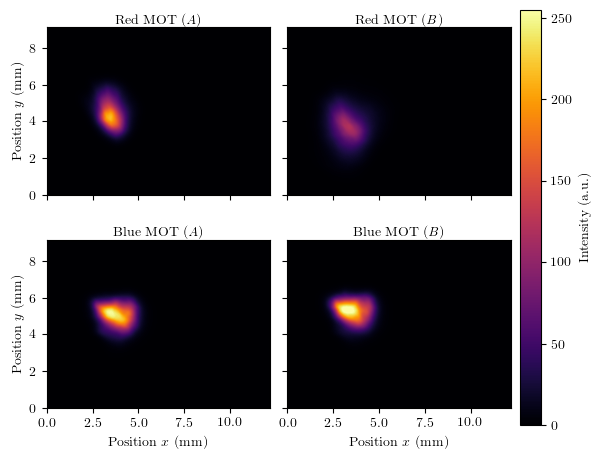

In [146]:
# plot six figures in a 2-row, 3-column layout
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, constrained_layout=True)

# Accessing individual axes:
ax1 = axes[0, 0]  # Top-left
ax2 = axes[0, 1]  # Top-right
ax3 = axes[1, 0]  # Bottom-left
ax4 = axes[1, 1]  # Bottom-right

pixel_size_um = (1/0.58)*3.45/1000  # how many mm per pixel

extent = [0, B_red_mot_horizontal_camera_image.shape[1]*pixel_size_um,  # x-axis: 0 to 1200 * 5
          0, B_red_mot_horizontal_camera_image.shape[0]*pixel_size_um]  # y-axis: 0 to 1200 * 5

ax1.imshow(R_red_mot_horizontal_camera_image, cmap='inferno', extent=extent,vmin=0,vmax=255)
ax1.set_title(r"Red MOT ($\it{A}$)",pad=3)
ax3.imshow(R_blue_mot_horizontal_camera_image, cmap='inferno', extent=extent,vmin=0,vmax=255)
ax3.set_title(r"Blue MOT ($\it{A}$)",pad=3)
ax2.imshow(B_red_mot_horizontal_camera_image, cmap='inferno', extent=extent,vmin=0,vmax=255)
ax2.set_title(r"Red MOT ($\it{B})$",pad=3)
ax4.imshow(B_blue_mot_horizontal_camera_image, cmap='inferno', extent=extent,vmin=0,vmax=255)
ax4.set_title(r"Blue MOT ($\it{B}$)",pad=3)

axes[0, 0].set_ylabel(r"Position $y$ (mm)")
axes[1, 0].set_ylabel(r"Position $y$ (mm)")
axes[1, 0].set_xlabel(r"Position $x$ (mm)")
axes[1, 1].set_xlabel(r"Position $x$ (mm)")

# Add a colorbar to the last subplot
cbar = fig.colorbar(ax3.imshow(R_blue_mot_horizontal_camera_image, cmap='inferno', extent=extent), ax=axes, shrink=0.995, pad=0.02)
cbar.set_label(r"Intensity (a.u.)")

# Save the figure
plt.savefig("250502 BBRedMOTImagesForRedVsBlueDetunedRegion.pdf", dpi=300)